In [1]:
#importing required libraries

import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from ipywidgets import interact, Dropdown
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [2]:
# Step 1: Define the folder where the datasets are stored
# This variable holds the relative path to the folder containing the dataset files.
# Ensure that all the dataset files in the folder are in CSV format and have meaningful names.
folder_path = 'dataset/' 

# Step 2: Load all CSV files in the folder
# The glob module is used to find all file paths matching the specified pattern in the folder.
# "*.csv" ensures that only files with a .csv extension are selected.
all_files = glob.glob(folder_path + "*.csv")  # Adjust the extension if using different file formats

# Step 3: Create an empty list to store the dataframes
# This list will temporarily store the data from each CSV file as a separate DataFrame.
dataframes = []

# Step 4: Read each file and add a "City" column
# Iterate through the list of CSV file paths obtained in the previous step.
for file in all_files:
    # Extract the city name from the file name.
    # The file name is assumed to represent the city name (e.g., "Hyderabad.csv").
    city_name = file.split("/")[-1].replace(".csv", "")  
    
    # Read the CSV file into a Pandas DataFrame.
    df = pd.read_csv(file)
    
    # Add a new column named 'City' to the DataFrame.
    # This column will store the city name extracted from the file name, making it easy to identify data from different cities.
    df['City'] = city_name  
    
    # Append the DataFrame to the list of DataFrames.
    dataframes.append(df)

# Step 5: Combine all dataframes into one
# Use pd.concat() to concatenate all the DataFrames in the list into a single DataFrame.
# ignore_index=True ensures that the resulting DataFrame has a continuous index, regardless of the indices in the original DataFrames.
combined_data = pd.concat(dataframes, ignore_index=True)

# Step 6: Save the combined dataset to a new CSV file
# Write the combined DataFrame to a new CSV file named 'combined_dataset.csv'.
# index=False ensures that the DataFrame index is not saved in the CSV file, keeping the file clean and focused on the data.
combined_data.to_csv('combined_dataset.csv', index=False)

# Print a success message to indicate that the combined dataset has been created and saved successfully.
print("Combined dataset created successfully!")

Combined dataset created successfully!


In [3]:
# Step 2: Basic Exploration
# This step involves performing a basic exploration of the combined dataset to understand its structure and contents.

# Print the shape of the dataset
# The shape attribute returns the dimensions of the dataset as a tuple (number of rows, number of columns).
# This gives an overview of how large the dataset is in terms of records and features.
print("\nShape of the dataset:", combined_data.shape)

# Print the column names of the dataset
# The columns attribute lists all the column names in the dataset.
# This helps identify what features (variables) are present in the dataset.
print("\nColumns in the dataset:\n", combined_data.columns)

# Print the first few rows of the dataset
# The head() method displays the first 5 rows of the dataset by default.
# This provides a quick look at the data to understand its structure, types of values, and sample data points.
print("\nFirst few rows of the dataset:\n", combined_data.head())


Shape of the dataset: (32963, 41)

Columns in the dataset:
 Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Stadium', 'City'],
      dtype='object')

First few rows of the dataset:
       Price  Area     Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0   6968000  1340     Nizampet                2       0                 0   
1  29000000  3498  Hitech City                4       0                 0   
2   6590000  1318    Man

In [4]:
# Step 3: Check for Missing Values
# This step checks for any missing values in the dataset to identify columns or features that may 
# require further preprocessing.

# Use the isnull() method to check for missing values in the dataset
# The isnull() method creates a DataFrame of the same shape as the original, with True indicating 
# missing values and False indicating non-missing values.

# Apply the sum() method to count the number of missing values in each column
# By summing the True values (which are treated as 1), this produces a series where the index 
# is the column name, and the value is the count of missing values in that column.
missing_values = combined_data.isnull().sum()

# Print the results
# Display the count of missing values for each column to identify which columns need attention during data preprocessing.
# Columns with a significant number of missing values may require imputation, removal, or other preprocessing techniques.
print("\nMissing values in each column:\n", missing_values)


Missing values in each column:
 Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe         

In [5]:
# Step 4: Statistical Summary of the Dataset
# The describe() method provides a statistical summary of numerical columns in the dataset.

# Generate the statistical summary for all numerical columns
# The output includes metrics such as count, mean, standard deviation (std), minimum (min), 25th percentile, median (50%), 75th percentile, and maximum (max).
# These metrics help understand the distribution, central tendency, and variability of the data.
combined_data.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
count,3.296300e+04,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,...,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000
mean,1.168672e+07,1293.362194,2.411765,0.381397,6.296454,6.403725,6.371325,6.351151,6.346328,6.356855,...,6.463671,6.272154,6.335497,6.259169,6.250887,6.261293,6.260413,6.259867,6.250675,6.260019
std,2.307368e+07,763.703754,0.812800,0.485737,4.075024,3.917995,3.966385,3.996086,4.003140,3.987722,...,3.826128,4.109373,4.018912,4.127551,4.139083,4.124586,4.125815,4.126577,4.139378,4.126365
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.071500e+06,853.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.711000e+06,1125.000000,2.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.200000e+07,1500.000000,3.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,8.546000e+08,16000.000000,9.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


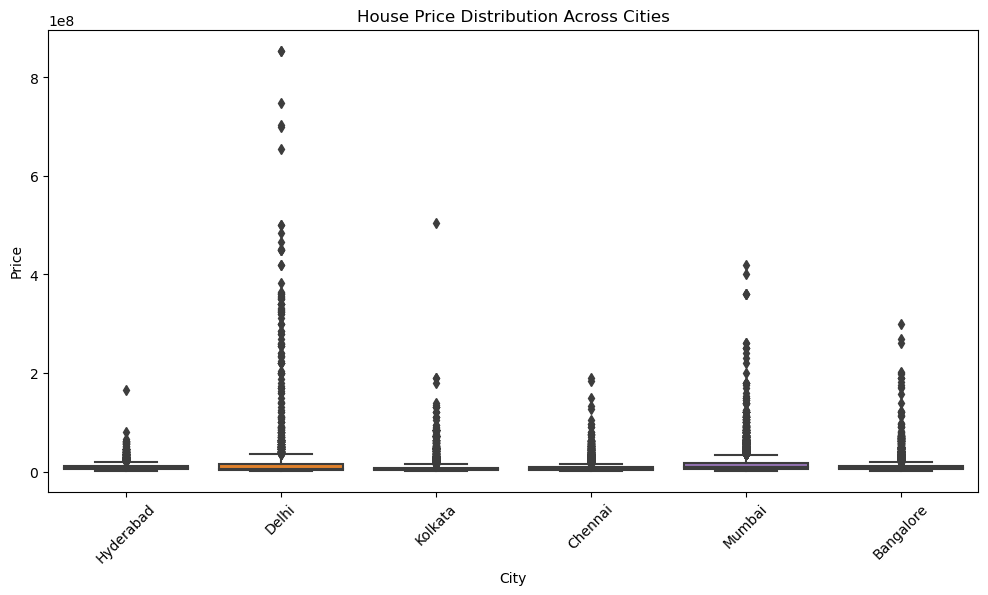

In [6]:
# Step 5: Visualize House Price Distribution Across Cities
# This visualization helps understand how house prices vary across different cities in the dataset.

plt.figure(figsize=(12, 6))  
# Create a new figure with specified dimensions (width = 12 inches, height = 6 inches) for better readability and aesthetics.

sns.boxplot(data=combined_data, x='City', y='Price')  
# Create a boxplot using Seaborn to visualize the distribution of house prices (y-axis) across cities (x-axis).
# The boxplot shows the median, quartiles, and outliers for house prices in each city.

plt.title('House Price Distribution Across Cities')  
# Add a title to the plot to describe what the visualization represents.

plt.ylabel('Price')  
# Label the y-axis to indicate that it represents house prices.

plt.xlabel('City')  
# Label the x-axis to indicate that it represents different cities in the dataset.

plt.xticks(rotation=45)  
# Rotate the x-axis labels by 45 degrees for better readability, especially if the city names are long or overlap.

plt.show()  
# Display the plot.

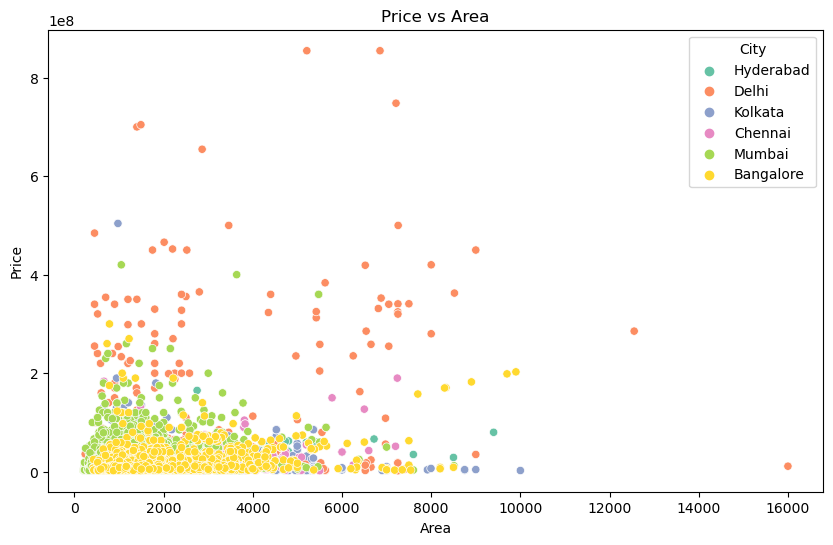

In [7]:
# Step 6: Scatter Plot for Price vs Area
# This scatter plot visualizes the relationship between property area (x-axis) and price (y-axis), 
# with points colored by city to highlight city-specific patterns.

plt.figure(figsize=(10, 6))  
# Create a new figure with specified dimensions (width = 10 inches, height = 6 inches) to ensure the plot is clear and easy to read.

sns.scatterplot(data=combined_data, x='Area', y='Price', hue='City', palette='Set2')  
# Use Seaborn's scatterplot to plot 'Area' on the x-axis and 'Price' on the y-axis.
# The 'hue' parameter groups data points by 'City', assigning different colors to points from different cities.
# The 'palette' parameter defines the color palette (Set2) used for the cities, providing visually distinct colors.

plt.title('Price vs Area')  
# Add a title to describe the plot, indicating it shows the relationship between property area and price.

plt.xlabel('Area')  
# Label the x-axis to indicate it represents the property area.

plt.ylabel('Price')  
# Label the y-axis to indicate it represents property price.

plt.legend(title='City')  
# Add a legend with the title 'City' to identify which color corresponds to which city in the dataset.

plt.show()  
# Display the plot.

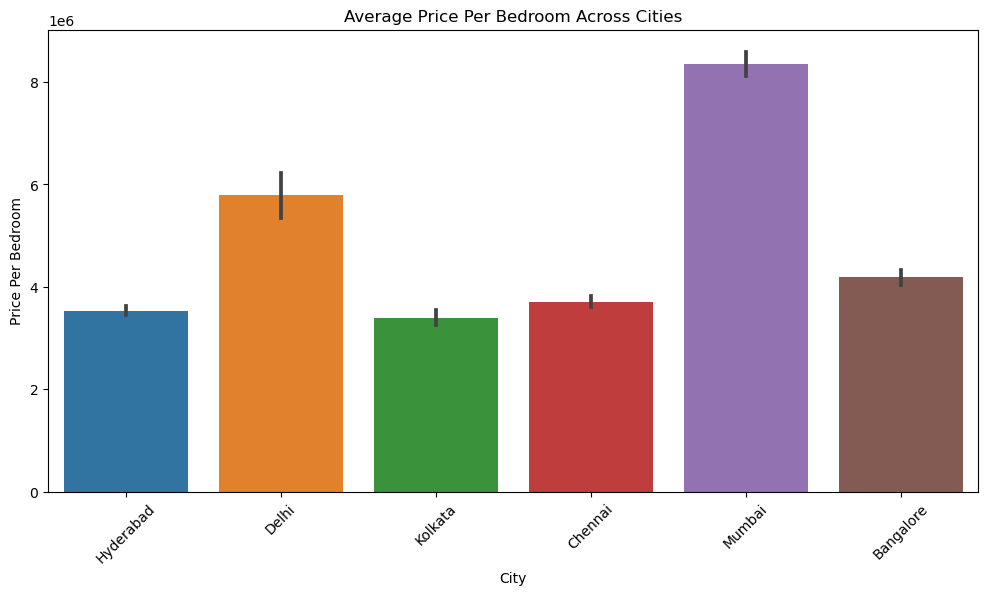

In [8]:
# Step 7: Calculate Price Per Bedroom and Visualize
# This step adds a new column, 'PricePerBedroom', to analyze and compare the average cost of a single bedroom across different cities.

# Create a new column 'PricePerBedroom' by dividing the 'Price' by the 'No. of Bedrooms'
# This normalization provides a more detailed metric for comparing property prices, focusing on the cost per bedroom.
combined_data['PricePerBedroom'] = combined_data['Price'] / combined_data['No. of Bedrooms']

# Visualize the Average Price Per Bedroom Across Cities
plt.figure(figsize=(12, 6))  
# Create a new figure with specified dimensions (width = 12 inches, height = 6 inches) to ensure the bar plot is clear and readable.

sns.barplot(data=combined_data, x='City', y='PricePerBedroom')  
# Use Seaborn's barplot to visualize the average 'PricePerBedroom' for each city.
# The x-axis represents the cities, and the y-axis shows the average price per bedroom.

plt.title('Average Price Per Bedroom Across Cities')  
# Add a title to the plot, describing its purpose (comparing bedroom prices across cities).

plt.ylabel('Price Per Bedroom')  
# Label the y-axis to indicate it represents the average price per bedroom.

plt.xlabel('City')  
# Label the x-axis to indicate it represents different cities in the dataset.

plt.xticks(rotation=45)  
# Rotate the x-axis labels by 45 degrees to improve readability, especially for longer city names.

plt.show()  
# Display the bar plot.

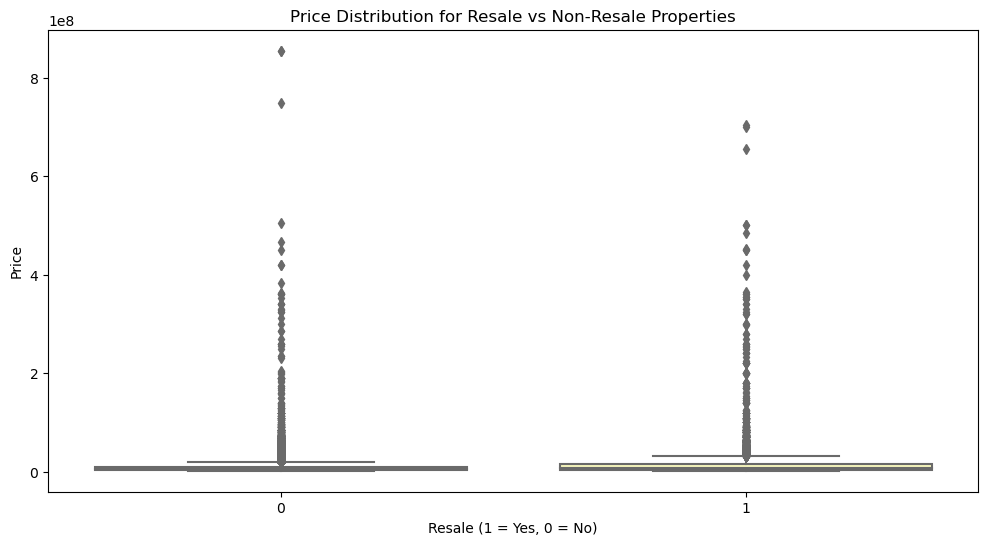

In [9]:
# Step 8: Price Distribution for Resale vs Non-Resale Properties
# This step visualizes the price distribution of properties based on whether they are resale or non-resale.

plt.figure(figsize=(12, 6))  
# Create a new figure with specified dimensions (width = 12 inches, height = 6 inches) for better readability.

sns.boxplot(data=combined_data, x='Resale', y='Price', palette='Set3')  
# Use Seaborn's boxplot to visualize the distribution of property prices (y-axis) for resale and non-resale properties (x-axis).
# The 'Resale' column is categorical (1 = Resale property, 0 = Non-resale property), and the 'Price' column contains numerical values.
# The 'palette' parameter defines the color scheme for the boxplot (Set3 is used here for distinct, soft colors).

plt.title('Price Distribution for Resale vs Non-Resale Properties')  
# Add a title to the plot, describing the comparison being visualized.

plt.xlabel('Resale (1 = Yes, 0 = No)')  
# Label the x-axis to indicate that it represents whether the property is resale (1) or non-resale (0).

plt.ylabel('Price')  
# Label the y-axis to indicate it represents property prices.

plt.show()  
# Display the boxplot.

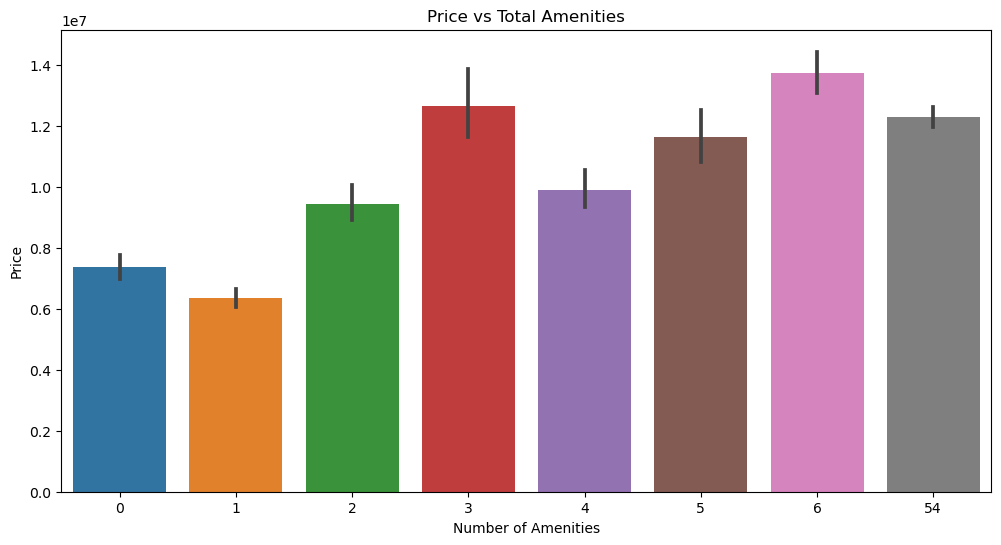

In [10]:
# Step 9: Relationship Between Total Amenities and Price
# This step analyzes how the total number of amenities affects property prices.

# Create a new column 'TotalAmenities'
# The new column is calculated by summing the binary values (0 or 1) across all amenity-related columns for each property.
# This provides a numerical count of amenities available for each property.
amenities = ['Gymnasium', 'SwimmingPool', 'ClubHouse', '24X7Security', 'PowerBackup', 'LiftAvailable']
combined_data['TotalAmenities'] = combined_data[amenities].sum(axis=1)

# Visualize the relationship between Total Amenities and Price
plt.figure(figsize=(12, 6))  
# Create a new figure with specified dimensions (width = 12 inches, height = 6 inches) for better clarity and aesthetics.

sns.barplot(data=combined_data, x='TotalAmenities', y='Price')  
# Use Seaborn's barplot to show the average property price (y-axis) for each number of amenities (x-axis).
# Each bar represents the average price for properties with a specific number of amenities.

plt.title('Price vs Total Amenities')  
# Add a title to the plot, describing the relationship being analyzed.

plt.xlabel('Number of Amenities')  
# Label the x-axis to indicate it represents the total number of amenities available in a property.

plt.ylabel('Price')  
# Label the y-axis to indicate it represents the property price.

plt.show()  
# Display the bar plot.

In [11]:
# Step 10: Define the target variable for model training
# The target variable (dependent variable) is the value we want the model to predict.
# Here, the target is set to the 'Price' column, which represents the property price.
target = "Price"

# Assign the target variable to a separate variable y_train for training purposes
# This separates the target values from the features (independent variables) in the dataset.
y_train = combined_data[target]

# Checking the shape of the DataFrame 'df'
# 'df.shape' returns a tuple representing the dimensions of the DataFrame (number of rows, number of columns).
# The 'shape' provides insights into the size and structure of the DataFrame being worked with.
shape = df.shape

# Print the shape of the DataFrame to confirm its dimensions
# This step ensures that the data has been loaded and processed correctly before proceeding further.
print(shape)

(6207, 41)


In [12]:
# Step 11: Define Features and Target Variables
# The `features` list contains all the independent variables (predictors) used to train the machine learning model.
# These variables represent the characteristics of each property that influence its price.
features = ["Area", "No. of Bedrooms", "Resale", "MaintenanceStaff", "Gymnasium", "SwimmingPool", 
            "LandscapedGardens", "JoggingTrack", "RainWaterHarvesting", "IndoorGames", "ShoppingMall", 
            "Intercom", "SportsFacility", "ATM", "ClubHouse", "School", "24X7Security", "PowerBackup", 
            "CarParking", "StaffQuarter", "Cafeteria", "MultipurposeRoom", "Hospital", "WashingMachine", 
            "Gasconnection", "AC", "Wifi", "Children'splayarea", "LiftAvailable", "BED", "VaastuCompliant", 
            "Microwave", "GolfCourse", "TV", "DiningTable", "Sofa", "Wardrobe"]

# Extract the feature columns (X) and the target variable (y)
# `X` is a DataFrame containing the features, while `y` is a Series containing the target variable ('Price').
X = combined_data[features]
y = combined_data["Price"]

# Step 12: Handle Missing Values in Features
# Identify columns that may contain missing or invalid placeholder values.
columns_to_impute = features  # All features in this case

for column in columns_to_impute:
    # Replace invalid placeholder values with NaN (e.g., 9 as a placeholder for missing data in certain columns).
    # This ensures that invalid values are treated as missing and can be handled appropriately.
    X.loc[X[column] == 9, column] = np.nan

# Step 13: Impute Missing Values
# Use the `SimpleImputer` from Scikit-learn to fill in missing values.
# The "most_frequent" strategy replaces missing values with the most frequent (mode) value in each column.
imputer = SimpleImputer(strategy="most_frequent")
X_imputed = imputer.fit_transform(X)

# Step 14: Convert Imputed Data Back to DataFrame
# After imputation, the result is a NumPy array. Convert it back to a DataFrame for compatibility with further steps.
# Preserve the original feature names by specifying the `columns` parameter.
X_imputed = pd.DataFrame(X_imputed, columns=features)

# Step 15: Split the Data into Training and Testing Sets
# Use Scikit-learn's `train_test_split` to divide the dataset into training (80%) and testing (20%) subsets.
# This ensures the model is evaluated on unseen data, preventing overfitting and improving generalizability.
# The `random_state` parameter ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [13]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}



In [14]:
# Step 16: Train and Evaluate Models
# Initialize an empty dictionary to store performance metrics for each model.
results = {}

# Loop through the dictionary of models to train and evaluate each model.
# 'models' is assumed to be a dictionary where keys are model names and values are model objects.
for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Use the trained model to predict the target variable on the test data
    y_pred = model.predict(X_test)
    
    # Step 17: Calculate Evaluation Metrics
    # Mean Absolute Error (MAE): Average magnitude of prediction errors
    mae = mean_absolute_error(y_test, y_pred)
    
    # Mean Squared Error (MSE): Average of squared prediction errors, penalizing larger errors
    mse = mean_squared_error(y_test, y_pred)
    
    # Root Mean Squared Error (RMSE): Square root of MSE, provides errors in the same unit as the target variable
    rmse = np.sqrt(mse)
    
    # Print results for the current model
    print(f"{model_name} Results:")
    print(f"MAE: {mae:.2f}")  # Rounded to 2 decimal places for better readability
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print("-" * 30)  # Separator for readability
    
    # Store the metrics in the results dictionary under the model's name
    results[model_name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Step 18: Display Results
# Convert the results dictionary into a DataFrame for better visualization and comparison.
results_df = pd.DataFrame(results).T  # Transpose to have models as rows and metrics as columns

# Print the performance comparison table
print("\nModel Performance Comparison:")
print(results_df)

Training Linear Regression...
Linear Regression Results:
MAE: 7797158.64
MSE: 392186692657826.12
RMSE: 19803704.01
------------------------------
Training Ridge Regression...
Ridge Regression Results:
MAE: 7796814.36
MSE: 392183704056818.31
RMSE: 19803628.56
------------------------------
Training Lasso Regression...
Lasso Regression Results:
MAE: 7797154.61
MSE: 392186663818056.75
RMSE: 19803703.29
------------------------------
Training Decision Tree...
Decision Tree Results:
MAE: 7823476.84
MSE: 491755360255036.88
RMSE: 22175557.72
------------------------------
Training Random Forest...
Random Forest Results:
MAE: 7535030.36
MSE: 426612676781004.25
RMSE: 20654604.25
------------------------------
Training Gradient Boosting...
Gradient Boosting Results:
MAE: 7625522.09
MSE: 397371053668339.88
RMSE: 19934168.00
------------------------------

Model Performance Comparison:
                            MAE           MSE          RMSE
Linear Regression  7.797159e+06  3.921867e+14  1.9803

In [15]:
# Step 19: Prepare Results Dictionary for City-Specific Analysis
# Initialize an empty list to store the results for each city and model combination.
results = []

# Step 20: Group Data by City and Train Models Separately
# Use the `groupby()` function to split the dataset into groups based on the 'City' column.
for city, city_data in combined_data.groupby('City'):
    print(f"\nTraining models for city: {city}")  # Indicate the current city being processed.
    
    # Separate features and target for the current city's data
    X = city_data[features]  # Select features (independent variables) for the city.
    y = city_data[target]  # Select the target variable (Price) for the city.
    
    # Step 21: Handle Missing Values for the Current City
    # Use SimpleImputer to replace missing values with the most frequent value for each column.
    imputer = SimpleImputer(strategy="most_frequent")
    X_imputed = imputer.fit_transform(X)  # Fit and transform the data for missing value handling.
    
    # Step 22: Split the Data into Training and Testing Sets
    # Split the city-specific data into training (80%) and testing (20%) subsets for model evaluation.
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
    
    # Step 23: Train and Evaluate Each Model for the City
    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Train the model on the training data.
        y_pred = model.predict(X_test)  # Predict the target variable on the testing data.
        
        # Step 24: Calculate Evaluation Metrics for the Current Model
        mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
        mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
        rmse = np.sqrt(mse)  # Root Mean Squared Error
        
        # Store the results for the current city and model in the results list.
        results.append({
            "City": city,  # The city for which the model was trained.
            "Model": model_name,  # The name of the machine learning model.
            "MAE": mae,  # Mean Absolute Error
            "MSE": mse,  # Mean Squared Error
            "RMSE": rmse  # Root Mean Squared Error
        })

# Step 25: Convert Results to a DataFrame for Better Presentation
# The results list is converted into a Pandas DataFrame for easy visualization and analysis.
results_df = pd.DataFrame(results)

# Display the results for all cities and models
print("\nModel Performance for Each City:")
print(results_df)


Training models for city: Bangalore


/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.614e+17, tolerance: 9.021e+13
  model = cd_fast.enet_coordinate_descent(



Training models for city: Chennai


/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.505e+17, tolerance: 3.948e+13
  model = cd_fast.enet_coordinate_descent(



Training models for city: Delhi


/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.673e+18, tolerance: 9.033e+14
  model = cd_fast.enet_coordinate_descent(



Training models for city: Hyderabad


/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.386e+16, tolerance: 1.621e+13
  model = cd_fast.enet_coordinate_descent(



Training models for city: Kolkata


/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.322e+17, tolerance: 1.136e+14
  model = cd_fast.enet_coordinate_descent(



Training models for city: Mumbai


/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.103e+18, tolerance: 2.505e+14
  model = cd_fast.enet_coordinate_descent(



Model Performance for Each City:
         City              Model           MAE           MSE          RMSE
0   Bangalore  Linear Regression  5.277685e+06  2.304500e+14  1.518058e+07
1   Bangalore   Ridge Regression  5.273689e+06  2.304235e+14  1.517971e+07
2   Bangalore   Lasso Regression  5.284852e+06  2.303501e+14  1.517729e+07
3   Bangalore      Decision Tree  5.049412e+06  2.339571e+14  1.529566e+07
4   Bangalore      Random Forest  4.756463e+06  2.184275e+14  1.477929e+07
5   Bangalore  Gradient Boosting  4.698033e+06  2.059338e+14  1.435039e+07
6     Chennai  Linear Regression  4.730030e+06  1.130602e+14  1.063298e+07
7     Chennai   Ridge Regression  4.724708e+06  1.129662e+14  1.062855e+07
8     Chennai   Lasso Regression  4.725138e+06  1.145859e+14  1.070448e+07
9     Chennai      Decision Tree  4.014945e+06  1.069599e+14  1.034214e+07
10    Chennai      Random Forest  3.905182e+06  9.868901e+13  9.934234e+06
11    Chennai  Gradient Boosting  4.207493e+06  9.553667e+13  9.77